# Optimization

## Exercise 1.1: Bisection 

One of the most common algorithms for numerical root-finding is *bisection*.

To understand the idea, recall the well-known game where:

- Player A thinks of a secret number between 1 and 100  
- Player B asks if it’s less than 50  
  
  - If yes, B asks if it’s less than 25  
  - If no, B asks if it’s less than 75  
  
And so on.

This is bisection, a relative of [binary search](https://en.wikipedia.org/wiki/Binary_search_algorithm). It works for all sufficiently well behaved increasing continuous functions with $ f(a) < 0 < f(b) $. 

Write an implementation of the bisection algorith, `bisect(f, lower=0, upper=1, tol=10e-5)` which, given a function `f`, a lower bound `lower` and an upper bound `upper` finds the point `x` where `f(x) = 0`. The parameter `tol` is a numerical tolerance, you should stop once your step size is smaller than `tol`.


Use it to minimize the function:

$$
f(x) = \sin(4 (x - 1/4)) + x + x^{20} - 1 \tag{2}
$$

in python: `lambda x: np.sin(4 * (x - 1/4)) + x + x**20 - 1`

The value where f(x) = 0 should be around `0.408`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sy
import scipy as sp
import scipy.optimize as opt
sy.init_printing(use_unicode=True) 
from datetime import datetime, date
import sqlite3

In [ ]:
# exercise 1.1
sns.set()
f_x = lambda x:  np.sin(4 * (x - 1/4))+x + x**20 - 1
x = np.linspace(-10, 10, 100)
plt.ylim(-10, 10)#if the ylimit would be higher we can not see the negative plot on y axis
plt.xlim(-1, 1)#to show better the point of coincidence of horizontal line and f_x
plt.axhline(0, color='r')#the horizontal line
plt.plot(x, f_x(x))

In [ ]:
#the plot without limitation on axises
def f(x):
     return np.sin(4 * (x - 1/4)) + x + x**20 - 1

x = np.linspace(-5, 5, 1000)

y = f(x)
# fig, ax = plt.subplots(1, 1, figsize=(5, 3))
# ax.axhline(0, color='k')
# ax.plot(x, y)
# ax.set_xlim(-5, 5)
# plt.show() 
f(0.4082935042806639)

In [ ]:
#denoting by sympy lib and calculating derivative of function by sympy
x = sy.symbols('x')
f_x = sy.sin(4 * (x - 1/4)) + x + x**20 - 1
derivative_f_x = sy.diff(f_x, x)
derivative_f_x

In [ ]:
x_min = opt.bisect(f, -1, 1)#if boundries increased the error will have
print(f"min: {x_min}")

In [ ]:
#bisect implimentaiton
def bisect(f_x, lower, upper, tolerance, max_iterations):
    # These x and y value lists will be used later for visualisation.
    x_bisect = [lower]
    y_bisect = [f_x(lower)]
    f_x_start = f_x(lower)
    iteration = 0
    while abs(f_x_start)>tolerance and iteration<max_iterations:   
        mean = np.mean([lower, upper])
        if f_x(lower)>0:
            if f_x(mean)>0:
                lower = mean
            else:
                upper = mean
        elif f_x(mean)<0: 
            lower = mean
        else:
            upper = mean
        iteration += 1
        x_bisect.append(mean)
        y_bisect.append(f_x(mean))

    print ("root of function: {:.3f}".format(mean))
    print ("Number of steps: ",len(x_bisect)-1)
    #plot_gradient(x, f_x(x) ,x_bisect, y_bisect)

In [ ]:
bisect(f, 0, 1, 10e-5, 20 )

## Exercise 1.2: (BONUS-STRETCH 👹)  Recursive Bisect

Write a recursive version of the bisection algorithm

In [ ]:
# exercise 1.2


## Exercise 2.1: Movies Regression

Write the best linear regression model you can on the [Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=ratings.csv) to predict the profitability of a movie (revenue - budget). Maintain the interpretability of the model.

Few notes:

1. Clean your data! Movies where the budget or revenue are invalid should be thrown out
2. Be creative with feature engineering. You can include processing to one-hot encode the type of movie, etc.
3. The model should be useful for someone **who is thinking about making a movie**. So features like the popularity can't be used. You could, however, use the ratings to figure out if making "good" or "oscar bait" movies is a profitable strategy.

In [2]:
import json

In [3]:
# exercise 2.1
#credits = pd.read_csv('archive/credits.csv')
#keywords = pd.read_csv('archive/keywords.csv')
#links = pd.read_csv('archive/links.csv')
movies = pd.read_csv('archive/movies_metadata.csv')
#ratings = pd.read_csv('archive/ratings.csv')

C:\Users\zmaso\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
#ratings = pd.DataFrame(ratings)
#ratings.head(3)

In [5]:

movies.head(1)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='vote_average', ylabel='revenue'>

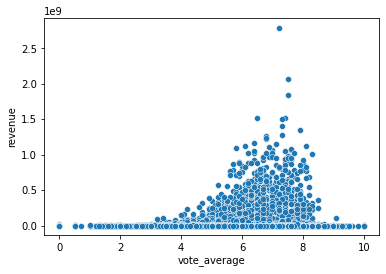

In [6]:
sns.scatterplot(movies.vote_average, movies.revenue)


In [7]:
import statsmodels.api as sm
sns.set()

In [31]:
movies['vote_average'].dropna(axis=0, inplace=True)
movies.vote_average.isna().sum()

6

In [ ]:
x = movies.vote_average
X = sm.add_constant(x)
y = movies.revenue
X = pd.DataFrame(sm.add_constant(x))
est1 = sm.Logit(
    (y > 0).astype(int),
    sm.add_constant(x)
).fit()

est1.summary()
X['stage1'] = est1.predict(X)
X.columns = ['const', 'x', 'stage1']

# Stage 2
est2 = sm.OLS(y, X).fit()
sm.graphics.plot_fit(est2, 1, vlines=False)
est2.summary()


C:\Users\zmaso\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

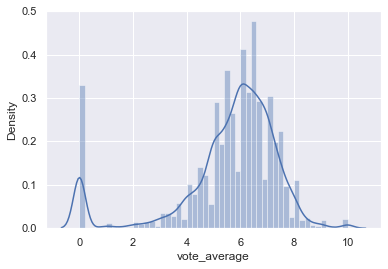

In [32]:
sns.distplot(movies.vote_average)

In [ ]:
sns.histplot(movies.revenue)
plt.xlim(0*1e9,.2*1e9)

In [ ]:
movies.revenue = movies.revenue.fillna(method='ffill')
movies.revenue.isna().sum()

In [ ]:
x = movies.revenue
X = sm.add_constant(x)
y = movies.vote_average

neg_bino_est = sm.NegativeBinomial(y,X).fit()
neg_bino_est.summary()


In [ ]:
#there is exotic data = there is  a spike on zero
#to solve the problem: two stage modelling has been used
#stage one: use the exotic data part as a predictor for the rest of the data not being in zero part
x1 = x.copy()

est1 = sm.Logit((y > 0).astype(int), sm.add_constant(x1)).fit()
est1.summary()


x1 = pd.DataFrame(sm.add_constant(x1))
x1['stage1'] = est1.predict(x1)
# Stage 2
est2 = sm.OLS(y, x1).fit()
est2.summary()

In [ ]:
#sns.distplot(movies.budget)

In [ ]:
#remove the useless columns
movies.drop(['video', 'adult', 'popularity',
            'poster_path', 'overview', 'tagline',
            'original_language', 'original_title', 
            'homepage', 'belongs_to_collection', 
             'status','imdb_id','spoken_languages', 'title', 'production_countries','production_companies' ], axis=1, inplace=True)

In [ ]:
movies.columns

In [ ]:
movies['release_date'] =  pd.to_datetime(movies['release_date'],format='%Y-%m-%d', errors='coerce')
movies['release_date'] = movies['release_date'].apply(lambda x: x.month)
movies['release_date'] = movies['release_date'].fillna(method='bfill')
movies['release_date'].isna().sum()

In [ ]:
#make dummies the genres column and then dropped it
movies = movies.join(movies.genres
   # Could be optimized
   .str.replace("'", '"')
   .apply(json.loads)
   .apply(lambda row : [d['name'] for d in row])
   .astype(str)
   # Could be done in a single regex
   .str.replace("[", "")
   .str.replace("]", "")
   .str.get_dummies(',')
).drop('genres', axis=1)

In [ ]:
movies.budget.iloc[19730] = movies.budget.iloc[19730].replace('/ff9qCepilowshEtG2GYWwzt2bs4.jpg','0')
movies.budget.isna().sum()


In [ ]:
movies.head(3)

In [ ]:
movies.budget = movies.budget.apply(lambda x: int(x))
#movies[movies.budget =='/ff9qCepilowshEtG2GYWwzt2bs4.jpg']


## Exercise 2.2: Movies Manual Regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using the normal equation $(X^T X)^{-1}X^Ty$.

Verify that the coefficients are the same.

In [ ]:
# exercise 2.2


## Exercise 2.3: Movies gradient descent regression

Use your `X` and `y` matrix from 2.1 to calculate the linear regression yourself using **gradient descent**. 

Hint: use `scipy.optimize` and remember we're finding the $\beta$ that minimizes the squared loss function of linear regression: $f(\beta) = (\beta X - y)^2$. This will look like part 3 of this lecture.

Verify your coefficients are similar to the ones in 2.1 and 2.2. They won't necessarily be exactly the same, but should be roughly similar.

In [ ]:
# exercise 2.3
